In [3]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

## question a

In [4]:
x = sym.symbols('x')
m = sym.symbols('m')
k, omega = sym.symbols('k, omega')

C1, C2 = sym.symbols('C1 C2')
kappa, L, k_s, eta_s, T = sym.symbols('kappa L k_s eta_s T')
W = sym.Function('W')(x)

ODE = sym.Eq(W.diff(x, 2) + kappa**2*W, 0)
display(ODE)

W = C1 * sym.sin(kappa*x) + C2 * sym.cos(kappa*x)

Eq(kappa**2*W(x) + Derivative(W(x), (x, 2)), 0)

In [5]:
W_m = sym.Function('W_m')(x,m)
W_m = W.subs(x, x-m*L)*sym.exp(-1j*k*m*L)
display(W_m)

(C1*sin(kappa*(-L*m + x)) + C2*cos(kappa*(-L*m + x)))*exp(-1.0*I*L*k*m)

In [6]:
eq1 = sym.Eq(W_m.subs(m, m), W_m.subs(m, m+1))
eq2 = sym.Eq(-W_m.diff(x).subs(m, m) + W_m.diff(x).subs(m, m+1), k_s/T * W_m.subs(m,m))

display(eq1)
display(eq2)

eqns = [eq1.expand(), eq2.expand()]
M = sym.linear_eq_to_matrix(eqns, [C1, C2])[0]
display(M)

Eq((C1*sin(kappa*(-L*m + x)) + C2*cos(kappa*(-L*m + x)))*exp(-1.0*I*L*k*m), (C1*sin(kappa*(-L*(m + 1) + x)) + C2*cos(kappa*(-L*(m + 1) + x)))*exp(-1.0*I*L*k*(m + 1)))

Eq(-(C1*kappa*cos(kappa*(-L*m + x)) - C2*kappa*sin(kappa*(-L*m + x)))*exp(-1.0*I*L*k*m) + (C1*kappa*cos(kappa*(-L*(m + 1) + x)) - C2*kappa*sin(kappa*(-L*(m + 1) + x)))*exp(-1.0*I*L*k*(m + 1)), k_s*(C1*sin(kappa*(-L*m + x)) + C2*cos(kappa*(-L*m + x)))*exp(-1.0*I*L*k*m)/T)

Matrix([
[                                                               -exp(-1.0*I*L*k*m)*sin(L*kappa*m - kappa*x) + exp(-1.0*I*L*k)*exp(-1.0*I*L*k*m)*sin(L*kappa*m + L*kappa - kappa*x),                                                                 exp(-1.0*I*L*k*m)*cos(L*kappa*m - kappa*x) - exp(-1.0*I*L*k)*exp(-1.0*I*L*k*m)*cos(L*kappa*m + L*kappa - kappa*x)],
[-kappa*exp(-1.0*I*L*k*m)*cos(L*kappa*m - kappa*x) + kappa*exp(-1.0*I*L*k)*exp(-1.0*I*L*k*m)*cos(L*kappa*m + L*kappa - kappa*x) + k_s*exp(-1.0*I*L*k*m)*sin(L*kappa*m - kappa*x)/T, -kappa*exp(-1.0*I*L*k*m)*sin(L*kappa*m - kappa*x) + kappa*exp(-1.0*I*L*k)*exp(-1.0*I*L*k*m)*sin(L*kappa*m + L*kappa - kappa*x) - k_s*exp(-1.0*I*L*k*m)*cos(L*kappa*m - kappa*x)/T]])

In [7]:
xi, K_s = sym.symbols('xi, K_s')

disp_eq = M.det().expand()
disp_eq = disp_eq.subs(k_s/T, K_s).subs(sym.exp(-1j*k*L), xi)
disp_eq = disp_eq/kappa
disp_eq = disp_eq/sym.exp(-2j*L*k*m)

In [8]:
disp_eq.simplify()

-K_s*xi*sin(L*kappa)/kappa - 2*xi*cos(L*kappa) + xi**2.0 + 1

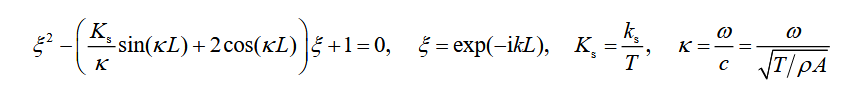

## question b

In [9]:
values = {L:10, K_s:4E3/15E3}

eq = sym.Eq(disp_eq.subs(values), 0)
sol = sym.solve(eq, xi)

In [10]:
display(sol[0])
display(sol[1])

0.0666666666666667*(15.0*kappa*cos(10.0*kappa) - 15.0*sqrt(kappa**2*cos(10.0*kappa)**2 - kappa**2 + 0.133333333333333*kappa*sin(20.0*kappa) - 0.0177777777777778*cos(10.0*kappa)**2 + 0.0177777777777778) + 2.0*sin(10.0*kappa))/kappa

0.0666666666666667*(15.0*kappa*cos(10.0*kappa) + 15.0*sqrt(kappa**2*cos(10.0*kappa)**2 - kappa**2 + 0.133333333333333*kappa*sin(20.0*kappa) - 0.0177777777777778*cos(10.0*kappa)**2 + 0.0177777777777778) + 2.0*sin(10.0*kappa))/kappa

In [11]:
xi1 = sol[0]
xi2 = sol[1]

k1 = 1j*sym.log(xi1)/(L)
k2 = 1j*sym.log(xi2)/(L)

print(k1)
print(k2)

xi1_lambda = sym.lambdify(kappa, xi1)
xi2_lambda = sym.lambdify(kappa, xi2)

k1_lambda = sym.lambdify(kappa, k1.subs(values))
k2_lambda = sym.lambdify(kappa, k2.subs(values))

1.0*I*log(0.0666666666666667*(15.0*kappa*cos(10.0*kappa) - 15.0*sqrt(kappa**2*cos(10.0*kappa)**2 - kappa**2 + 0.133333333333333*kappa*sin(20.0*kappa) - 0.0177777777777778*cos(10.0*kappa)**2 + 0.0177777777777778) + 2.0*sin(10.0*kappa))/kappa)/L
1.0*I*log(0.0666666666666667*(15.0*kappa*cos(10.0*kappa) + 15.0*sqrt(kappa**2*cos(10.0*kappa)**2 - kappa**2 + 0.133333333333333*kappa*sin(20.0*kappa) - 0.0177777777777778*cos(10.0*kappa)**2 + 0.0177777777777778) + 2.0*sin(10.0*kappa))/kappa)/L


[1.00000000e-03+0.j 2.10019002e-02+0.j 4.10038004e-02+0.j ...
 1.99959996e+02+0.j 1.99979998e+02+0.j 2.00000000e+02+0.j]


c:\Users\bart\anaconda3\envs\slender\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\bart\anaconda3\envs\slender\Lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


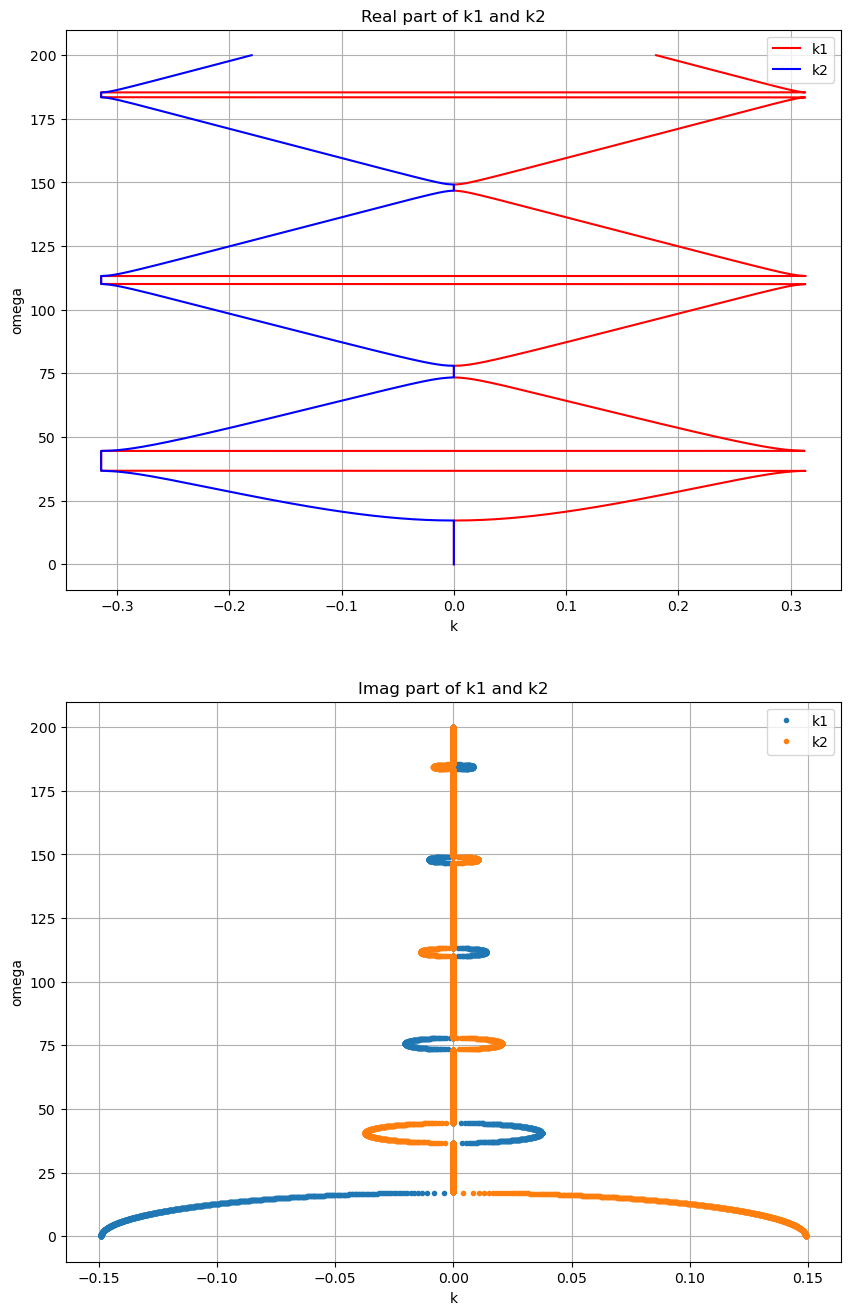

In [12]:
omega_values = np.linspace(0.001, 200, 10000, dtype=complex)
print(omega_values)
kappa_values = omega_values/np.sqrt(15E3/1.1)

T_val = 15E3
rhoA = 1.1

fig, ax = plt.subplots(2, 1, figsize=(10, 16))

ax[0].plot(np.real(k1_lambda(kappa_values)), omega_values, 'r', label='k1')
ax[0].plot(np.real(k2_lambda(kappa_values)), omega_values, 'b',  label='k2')

ax[0].set_ylabel('omega')
ax[0].set_xlabel('k')
ax[0].legend()
ax[0].set_title('Real part of k1 and k2')
ax[0].grid();

ax[1].plot(np.imag(k1_lambda(kappa_values)), omega_values, '.', label='k1')
ax[1].plot(np.imag(k2_lambda(kappa_values)), omega_values, '.',  label='k2')
ax[1].set_ylabel('omega')
ax[1].set_xlabel('k')
ax[1].legend()
ax[1].set_title('Imag part of k1 and k2')
ax[1].grid();

- real part is nonzero when imaginary part is zero and the other way around
- repeating in k with period of 2pi/L.
- repeating in omega with 2pi/L * sqrt(T/rhoA)
- mention stop bands and pass bands
- similarity with beam model

In [13]:
# Period of k1 and k2 in wavenumber k (horizontal)
print(f'Period of k1 and k2 in wavenumber : {np.pi/10:.3f} 1/m')

Period of k1 and k2 in wavenumber : 0.314 1/m


In [14]:
# Period of k1 and k2 in frequency omega (vertical)
print(f'Period of k1 and k2 in omega : {np.sqrt(15E3/1.1) * 2*np.pi/10:.3f} Hz')

Period of k1 and k2 in omega : 73.372 Hz


# question c

- Equation of Motion in omega, k domain

$$
(-\rho A\omega^2 + T k^2) \tilde{w} = 2\pi Q_0 \delta(\omega - kV) - \hat{R}(\omega) \sum_{n=-\infty}^{\infty} e^{-i \left( \frac{\omega}{V} - k \right) nL}
$$

$$
(-\rho A\omega^2 + T k^2) \tilde{w} = 2\pi \frac{Q_0}{V} \, \delta\left(\frac{\omega}{V} - k\right)
- \hat{R}(\omega) \frac{2\pi}{L} \sum_{n=-\infty}^{\infty} \delta\left(\frac{\omega}{V} - k - \frac{2\pi n}{L}\right)
$$

- Solution for generic R (omega, k domain)

$$
\tilde{w}(\omega, k) = \frac{2\pi}{\Delta_b(\omega, k)} \frac{1}{V} \frac{1}{T} 
\left[ Q_0 \delta \left( \frac{\omega}{V} - k \right) - \hat{R} \frac{V}{L} \sum_{n=-\infty}^{\infty} 
\delta \left( \frac{\omega - \omega_n}{V} - k \right) \right]
$$

$$
\Delta_b(\omega, k) = k^2 - \frac{\rho A}{T} \omega^2
$$

$$
\omega_n = n \frac{2\pi V}{L}
$$

- Solution for generic R (omega, x domain)

$$
\hat{w}(x, \omega) = \frac{1}{V} \frac{1}{T} \left[
\frac{1}{\Delta_b(\omega, V)} Q_0 e^{-i \frac{\omega}{V} x}
- \hat{R} \frac{V}{L} \sum_{n=-\infty}^{\infty} \frac{1}{\Delta_b(\omega, \omega_n, V)} e^{-i \frac{(\omega - \omega_n)}{V} x}
\right]
$$

$$
\Delta_b(\omega, V) = \left(\frac{\omega}{V}\right)^2 - \frac{\rho A}{T} \omega^2
$$

$$
\Delta_b(\omega, \omega_n, V) = \left(\frac{\omega - \omega_n}{V}\right)^2 - \frac{\rho A}{T} \omega^2
$$

- Solution for generic R at origin

$$
\hat{w}(0, \omega) = \frac{1}{V} \frac{1}{T} \left[
\frac{1}{\Delta_b(\omega, V)} Q_0
- \hat{R} \frac{V}{L} \sum_{n=-\infty}^{\infty} \frac{1}{\Delta_b(\omega, \omega_n, V)}
\right]
$$

- Use following definition to get rid of infinite sum

$$
\sum_{n=-\infty}^{\infty} \frac{1}{\left(\frac{\omega L}{V} - 2\pi n\right)^2 - (\kappa L)^2}
= \frac{1}{2\kappa L} \frac{\sin(\kappa L)}{\cos(\kappa L) - \cos\left(\frac{\omega}{V}L\right)}
$$

$$
\kappa = \frac{\omega}{\sqrt{T/\rho A}}
$$

$$
\Delta_b(\omega, \omega_n, V) = \left(\frac{\omega - \frac{2 \pi n V}{L}}{V}\right)^2 - \kappa^2
$$

$$
L^2 \Delta_b(\omega, \omega_n, V) = \left(\left(\frac{\omega}{V} - \frac{2 \pi n}{L}\right)^2 - \kappa^2\right) L^2
$$

$$
L^2 \Delta_b(\omega, \omega_n, V) = \left(\frac{\omega L}{V} - 2 \pi n\right)^2 - (\kappa L)^2
$$

$$
\frac{1}{\Delta_b(\omega, \omega_n, V)} = \frac{L^2}{\left(\frac{\omega L}{V} - 2 \pi n\right)^2 - (\kappa L)^2}
$$

$$
\sum_{n=-\infty}^{\infty} \frac{1}{\Delta_b(\omega, \omega_n, V)} = \frac{L^2}{2\kappa L} \frac{\sin(\kappa L)}{\cos(\kappa L) - \cos\left(\frac{\omega}{V}L\right)}
$$

- Solution for generic R at origin

$$
\hat{w}(0, \omega) = \frac{1}{V} \frac{1}{T} \left[
\frac{1}{\Delta_b(\omega, V)} Q_0
- \hat{R} \frac{V}{L} \frac{L}{2\kappa} \frac{\sin(\kappa L)}{\cos(\kappa L) - \cos\left(\frac{\omega}{V}L\right)}
\right]
$$

- Specific reaction force

$$
\hat{R}=(k_s + i \omega \eta_s) \hat{w}(0,\omega)
$$

Now we can solve for $\hat{w}(0,\omega)$ with sympy.

In [15]:
rhoA, V, T, Q0, L, omega, k_s, eta_s = sym.symbols('rhoA V T Q0 L omega k_s eta_s')

values = {rhoA:1.1, T:15E3, L:10, k_s:4E3, eta_s:0.05, Q0:55, V:2800}

w_hat = sym.Function('w_hat')(omega)

delta_b = (omega/V)**2 - rhoA/T * omega**2
R_hat = (k_s + sym.I*eta_s*omega)*w_hat
kappa = omega/sym.sqrt(T/rhoA)

eq1 = sym.Eq(w_hat, 1/V * 1/T * (1/delta_b * Q0 - R_hat * V/2*kappa * sym.sin(kappa*L)/(sym.cos(kappa*L) - sym.cos(omega/V * L))))

In [16]:

display(eq1.subs(values))

w_hat = sym.solve(eq1.subs(values), w_hat)[0]

Eq(w_hat(omega), -2.85449612859225e-7*omega*(0.05*I*omega + 4000.0)*w_hat(omega)*sin(0.0856348838577675*omega)/(-cos(omega/280) + cos(0.0856348838577675*omega)) - 0.0178882564757812/omega**2)

[71.2 77.8]


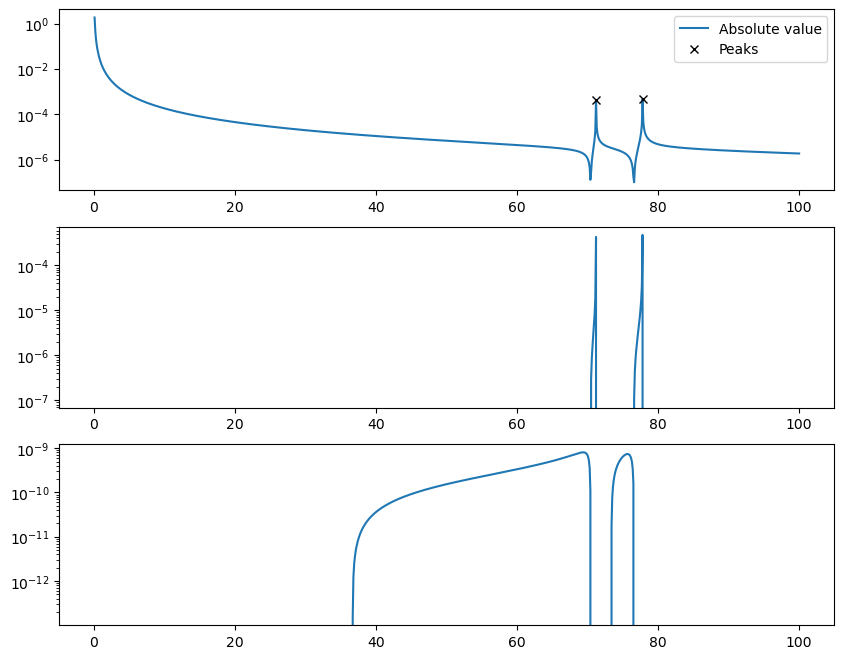

In [ ]:
from scipy.signal import find_peaks

w_hat_lambda = sym.lambdify(omega, w_hat)
omega_values = np.linspace(0.1, 100, 1000)

fig, ax = plt.subplots(3, 1, figsize=(10, 8))

ax[0].semilogy(omega_values, np.abs(w_hat_lambda(omega_values)), label='Absolute value')
ax[1].semilogy(omega_values, np.real(w_hat_lambda(omega_values)), label='Real part')
ax[2].semilogy(omega_values, np.imag(w_hat_lambda(omega_values)), label='Imag part')

# Find peaks in the absolute value of w_hat
abs_vals = np.abs(w_hat_lambda(omega_values))
peaks, _ = find_peaks(abs_vals)

# Plot the peaks on the absolute value plot
ax[0].plot(omega_values[peaks], abs_vals[peaks], "kx", label='Peaks')
ax[0].legend()

print(omega_values[peaks])

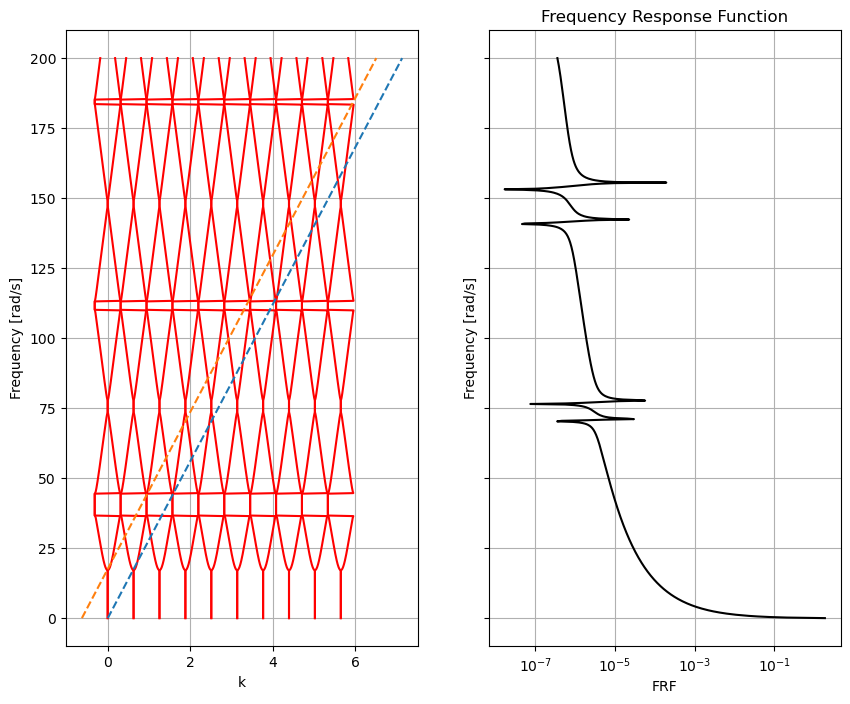

In [25]:
omega_values = np.linspace(0.1, 200, 1000, dtype=complex)
kappa_values = omega_values/np.sqrt(15E3/1.1)


fig, ax = plt.subplots(1,2, figsize=(10, 8), sharey=True)

for i in range(10):
    ax[0].plot(np.real(k1_lambda(kappa_values))+2*i*np.pi/10, omega_values, 'r', label='k1')
    ax[0].plot(np.real(k2_lambda(kappa_values))+2*i*np.pi/10, omega_values, 'r', label='k2')

ax[0].plot(omega_values/28, omega_values, '--', label='Kinematic Invariant')
ax[0].plot(omega_values/28 - 2*np.pi/10, omega_values, '--', label='Kinematic Invariant + 2pi/10')
ax[0].set_xlabel('k')
ax[0].set_ylabel('Frequency [rad/s]')
ax[0].grid()
# ax[0].set_xlim([6,10])

ax[1].semilogx(np.abs(w_hat_lambda(omega_values)), omega_values, 'black', label='FRF');
ax[1].set_xlabel('FRF')
ax[1].set_ylabel('Frequency [rad/s]')
ax[1].set_title('Frequency Response Function')
ax[1].grid()


# question d

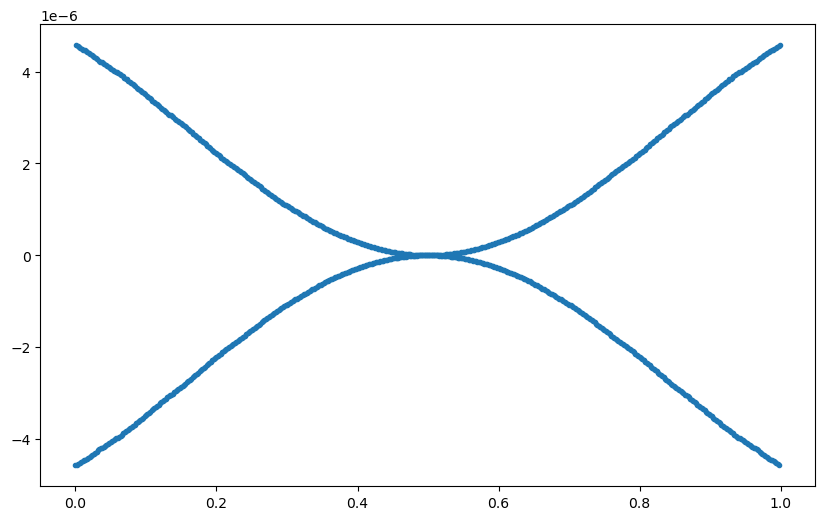

In [41]:
N = 1000

fs = 1000
df = fs/N
frequency_values = np.linspace(-fs/2, fs/2, N, dtype=complex)
omega_values = 2 * np.pi * frequency_values

dt = 1 / fs

w_hat = w_hat_lambda(omega_values)

w_time = np.fft.ifft(w_hat)

time = np.arange(N) * dt 

plt.figure(figsize=(10, 6))
# plt.plot(time, w_time.imag)
plt.plot(time, w_time.real, '.')